# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
!ls
!pip install xlrd
#references for date formats 
#https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/


Cherry Blossoms.ipynb KyotoFullFlower7.xls
You should consider upgrading via the '/Users/danielleli/.pyenv/versions/3.10.3/bin/python3.10 -m pip install --upgrade pip' command.


## 1. Read in the file using pandas, and look at the first five rows

* *Tip: You will probably need to pip install something to make this Excel file work!*

In [2]:
df=pd.read_excel("KyotoFullFlower7.xls")
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add **a parameter to make sure your columns look right**. How can you tell pandas to skip rows?

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
#
df=pd.read_excel("KyotoFullFlower7.xls", skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some NaN values

It looks like you should have NaN/missing values in the beginning of the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

* *Tip: it's another open with reading in the file!*

In [5]:

df=pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values="-")
df.columns=df.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")\
    .str.replace("(", "").str.replace(")", "")

df.head()

/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_66732/388427170.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("(", "").str.replace(")", "")
/var/folders/fy/56t7kzwn4m196p75kksy9j5c0000gn/T/ipykernel_66732/388427170.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace("(", "").str.replace(")", "")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What reference is the most commonly used when figuring out cherry blossom flowering dates?

If the first result is `"-"`, you need to redo the last question.

In [6]:
df.reference_name.value_counts()

NEWS-PAPER(ARASHIYAMA)        94
SUGIURAKE-NIKKI               38
MYOHOIN-HINAMIKI              32
OYUDONONO-UENO-NIKKI          26
OYUDONONO-UENO-NIKKI [EDA]    21
                              ..
GONARAIN-GYOSEI-BASSHO         1
MORIMITSU-KOKI                 1
SANKAIKI                       1
TSUKIMOUDE-WAKASHU(PART-3)     1
NEWS-PAPET(DAIGO-JI)           1
Name: reference_name, Length: 222, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

In [7]:
df[df.full_flowering_date.notnull()]

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 6.5 Confirm you now have 827 rows

In [8]:
df[df.full_flowering_date.notnull()].shape

#write over to only have the non missing data
df=df[df.full_flowering_date.notnull()]

## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

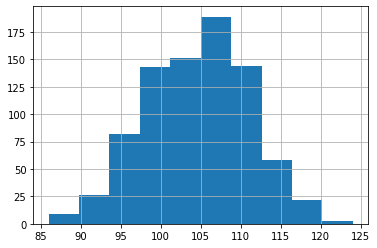

In [9]:
#Full-flowering date (day of year).
#Full-flowering date (calender date, e.g. 402 --> April 2).
#df.dtypes
df.full_flowering_date_doy.hist()


## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

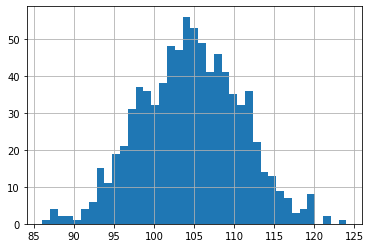

In [10]:

df.full_flowering_date_doy.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [11]:
df.full_flowering_date_doy.mean(), df.full_flowering_date_doy.count()

(104.54050785973398, 827)

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [12]:
df.query("ad<1900").full_flowering_date_doy.mean()

105.20728291316527

## 11. How about after 1900?

In [13]:
df.query("ad>1900").full_flowering_date_doy.mean()

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [14]:
#Column E (data_type_code) has to have code 4.
df.query("data_type_code==4").shape


(39, 6)

## 13. Display the rows where our data was from a title in Japanese poetry

In [15]:
df.query("data_type_code==4")

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:xlabel='ad'>

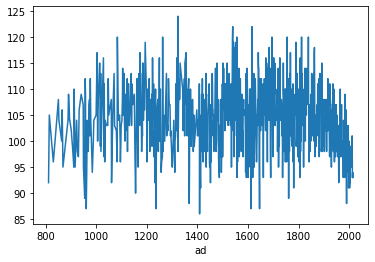

In [16]:
#Graph the mean of full-flowering averaged over AD year buckets.
df.groupby(by="ad").full_flowering_date_doy.mean().plot()



## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [17]:
df.rolling(10, on='ad', min_periods=5).full_flowering_date_doy.mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: full_flowering_date_doy, dtype: float64

<AxesSubplot:xlabel='rolling_date'>

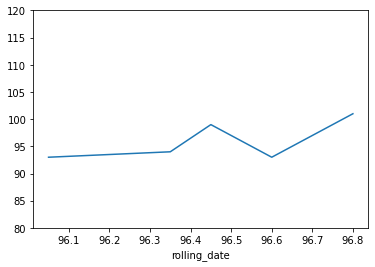

In [18]:
df["rolling_date"]=df.rolling(20, on='ad', min_periods=5).full_flowering_date_doy.mean().tail()

df.groupby(by="rolling_date").full_flowering_date_doy.mean().plot(ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [19]:
df["flower_date"]=pd.to_datetime(df.full_flowering_date, format='%m%d', errors='coerce')
df[["flower_date", "full_flowering_date"]].sample(5)

#Hmm, it keeps picking 1900 as the default year. I don't know how to make that stop but I can just ignore it


,flower_date,full_flowering_date
353,1900-04-06,406.0
871,1900-04-21,421.0
164,1900-04-14,414.0
1180,1900-04-09,409.0
458,1900-04-06,406.0


## 17. Using your new column, how many blossomings happened in each month?

In [20]:
df.flower_date.dt.month.value_counts()

4    814
3     10
5      3
Name: flower_date, dtype: int64

## 18. Make a bar graph of how many blossomings happened in each month.

<AxesSubplot:>

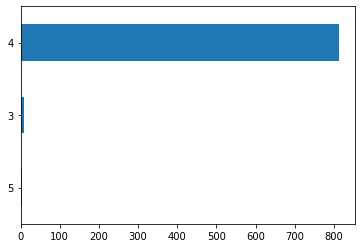

In [21]:
df.flower_date.dt.month.value_counts().sort_values().plot(kind="barh")

## 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.`

*Tip: If you didn't drop the rows missing full-flowering dates earlier, it will yell at you about missing data. Go back up and fix Number 6!*

In [22]:
df["month"]=df.flower_date.dt.month
df.head()
df["day_of_month"]=df.flower_date.dt.day
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,flower_date,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-01,4,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-15,4,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,1900-04-06,4,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-18,4,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,1900-04-14,4,14


## 20. Adding a date column

If you don't have a nice-looking date column yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. By "nice looking," I mean it should say something like `April 11`.

* Instead of using the two existing columns, you could learn to use `.dt.strftime` as mentioned above.

In [23]:
df.flower_date=df.flower_date.dt.strftime('%b %d')
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,flower_date,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,Apr 01,4,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,Apr 15,4,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,Apr 06,4,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 18,4,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 14,4,14


<AxesSubplot:>

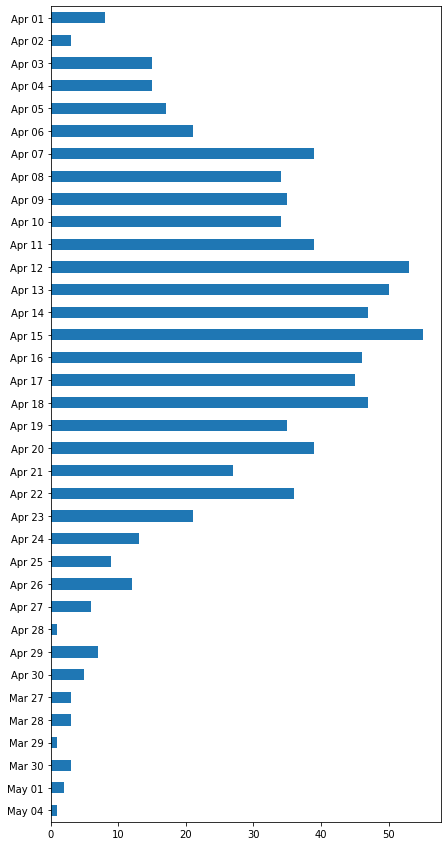

In [24]:
df.flower_date.value_counts().sort_index(ascending=False).plot(kind="barh", figsize=(7, 15))

## 21. What day of the week do cherry blossoms like to blossom on?

Do they get the weekends off?

In [25]:
#Now need to add on the actual year, not 1900.
df = df.rename(columns={'ad': 'year'})
df = df.rename(columns={'day_of_month': 'day'})
df.head()



,year,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,flower_date,month,day
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,Apr 01,4,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,Apr 15,4,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,Apr 06,4,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 18,4,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 14,4,14


In [26]:
#Note that pandas does not recognize years before 1700 or after 2300 ish so those will become NaT w/ errors coerce.
df['datetest']=df.month.astype(str).str.zfill(2)+"/"+df.day.astype(str).str.zfill(2)+"/"+df.year.astype(str).str.zfill(4)
df['flower_date_all'] = pd.to_datetime(df['datetest'], format='%M/%d/%Y', errors = 'coerce')
df['flower_date_all'] = pd.to_datetime(df['datetest'], errors = 'coerce')

df.head()


,year,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,flower_date,month,day,datetest,flower_date_all
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,NaN,Apr 01,4,1,04/01/0812,NaT
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,NaN,Apr 15,4,15,04/15/0815,NaT
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,NaN,Apr 06,4,6,04/06/0831,NaT
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 18,4,18,04/18/0851,NaT
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,Apr 14,4,14,04/14/0853,NaT


<AxesSubplot:>

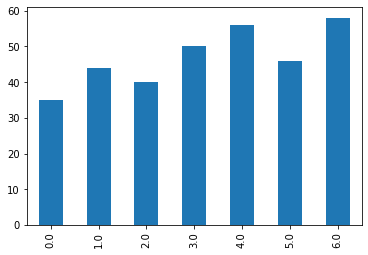

In [27]:
#Now create the day of week stuff

df["dayofweek"]=df.flower_date_all.dt.dayofweek

df.dayofweek.value_counts().sort_index().plot(kind="bar")

# YOU ARE DONE.

And **incredible.**